## Introduction

In this part of the project, the resulting csv file from the frist notebook is merged with a new csv file. schema level conflicts such as missing columns,column order mismatch and different data types were addressed. Data level conflicts such as duplicates were also addressed resulting in the new merged dataset.


##  Import libraries 

In [1]:
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

### Examining and loading the data
Examining "dataset2.csv" structure and schema. 

In [2]:
df2 = pd.read_csv("dataset2.csv")
df2.head()

,Monthly Payment,Closing,Organisation,Location,Category,Full-Time Equivalent (FTE),Opening,Job Title,Type
0,1200.00,2012-12-27 12:00:00,Protocol Education,UK,Education,0.8,2012-11-27 12:00:00,Higher Level Teaching Assistant (HLTA),NaN
1,3125.00,2013-08-25 15:00:00,Cordius Ltd,UK,Information Technology,1.0,2013-06-26 15:00:00,Software Developers / Software Architects Not...,Permanent
2,4333.33,2013-01-16 15:00:00,Understanding Recruitment,Walton-On-Thames,Information Technology,1.0,2012-10-18 15:00:00,Senior BI Consultant (Cognos),Permanent
3,3750.00,2013-02-13 15:00:00,Wallace Hind Selection,UK,Sales,1.0,2012-12-15 15:00:00,"Technical Sales Manager, Pigments Fillers to S...",NaN
4,2916.67,2013-01-12 12:00:00,Greenhill Group Ltd,Eastern England,Sales,1.0,2012-12-29 12:00:00,Channel Account Manager Software,NaN


In [3]:
#inspecting the data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Monthly Payment             5000 non-null   float64
 1   Closing                     5000 non-null   object 
 2   Organisation                4514 non-null   object 
 3   Location                    5000 non-null   object 
 4   Category                    5000 non-null   object 
 5   Full-Time Equivalent (FTE)  5000 non-null   float64
 6   Opening                     5000 non-null   object 
 7   Job Title                   5000 non-null   object 
 8   Type                        3580 non-null   object 
dtypes: float64(2), object(7)
memory usage: 351.7+ KB


In [4]:
# Checking the first dataset
df1 = pd.read_csv("dataset1_solution.csv")
df1.head()

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,71841720,Optical Assistant Oxfordshire,Oxfordshire,Inspired Selections,non-specified,non-specified,Healthcare & Nursing Jobs,14500.0,2012-04-04 15:00:00,2012-06-03 15:00:00,jobs.opticianonline.net
1,72226495,Optical Dispensing Manager Jobs in Durham,Durham,Flame Health Associates LLP,non-specified,non-specified,Healthcare & Nursing Jobs,22000.0,2012-04-08 15:00:00,2012-04-22 15:00:00,jobs.opticianonline.net
2,70205812,Optometrist Longton,Stoke-On-Trent,Zest Optical,non-specified,non-specified,Healthcare & Nursing Jobs,44000.0,2012-03-26 12:00:00,2012-04-09 12:00:00,jobs.opticianonline.net
3,71654671,Dispensing Optician Manager location Weymouth ...,Weymouth,Match2Match,non-specified,non-specified,Healthcare & Nursing Jobs,25000.0,2013-07-05 15:00:00,2013-09-03 15:00:00,jobs.opticianonline.net
4,71841842,Part Time Optometrist Wiltshire,Wiltshire,Inspired Selections,non-specified,non-specified,Healthcare & Nursing Jobs,50000.0,2013-09-19 00:00:00,2013-10-19 00:00:00,jobs.opticianonline.net


### Resolving schema conflicts

#In this part of the project, the second dataset is transformed to match the second dataset for seamless merging.

#### Conflict 1: Missing Columns
table 2 does not have the column "Id" and "SourceName"

The conflict is fixed by generating the Id column for df2. The generated Id's are random and are not found in df1.

In [5]:
#the list of IDs in df1
existing_ids = set(df1["Id"])
# Generate a list of IDs for df2 that are not in df1
generated_ids = []
while len(generated_ids) < len(df2):
    new_id = random.randint(10000000, 99999999)  # Generate 8-digit integer
    if new_id not in existing_ids:
        generated_ids.append(new_id)

# Assign the generated IDs to df2
df2["Id"] = generated_ids
df2

,Monthly Payment,Closing,Organisation,Location,Category,Full-Time Equivalent (FTE),Opening,Job Title,Type,Id
0,1200.00,2012-12-27 12:00:00,Protocol Education,UK,Education,0.8,2012-11-27 12:00:00,Higher Level Teaching Assistant (HLTA),NaN,74452424
1,3125.00,2013-08-25 15:00:00,Cordius Ltd,UK,Information Technology,1.0,2013-06-26 15:00:00,Software Developers / Software Architects Not...,Permanent,21596209
2,4333.33,2013-01-16 15:00:00,Understanding Recruitment,Walton-On-Thames,Information Technology,1.0,2012-10-18 15:00:00,Senior BI Consultant (Cognos),Permanent,26209684
3,3750.00,2013-02-13 15:00:00,Wallace Hind Selection,UK,Sales,1.0,2012-12-15 15:00:00,"Technical Sales Manager, Pigments Fillers to S...",NaN,63580090
4,2916.67,2013-01-12 12:00:00,Greenhill Group Ltd,Eastern England,Sales,1.0,2012-12-29 12:00:00,Channel Account Manager Software,NaN,82331703
...,...,...,...,...,...,...,...,...,...,...
4995,5833.33,2013-03-31 00:00:00,Jonathan Lee Recruitment Ltd,London,Finance,1.0,2013-01-30 00:00:00,Head of Regulatory Policy,Permanent,86492769
4996,5000.00,2012-08-27 12:00:00,Impact 360,Berkshire,Information Technology,1.0,2012-06-28 12:00:00,Android Developer eMarkets and eCommerce Ber...,Permanent,66519800
4997,2833.33,2013-07-23 00:00:00,Aspire Data Recruitment,London,Finance,1.0,2013-04-24 00:00:00,SAS Senior Collections Recoveries Analyst,Permanent,32361732
4998,4791.67,2012-12-18 15:00:00,Annapurna HR Ltd,London,Information Technology,1.0,2012-11-18 15:00:00,Lead PHP Magento Developer London ****k,Permanent,90043389


In [6]:
#add SourceName column for table 2. They are all assigned the same website since they came from the same source.
df2["SourceName"] = "jobhuntlisting.com"
df2.head(1)

,Monthly Payment,Closing,Organisation,Location,Category,Full-Time Equivalent (FTE),Opening,Job Title,Type,Id,SourceName
0,1200.0,2012-12-27 12:00:00,Protocol Education,UK,Education,0.8,2012-11-27 12:00:00,Higher Level Teaching Assistant (HLTA),NaN,74452424,jobhuntlisting.com


#### Conflict 2: Columns are not in the right order.

In [7]:
#Inspecting the columns
print(df1.columns)
print(df2.columns)

Index(['Id', 'Title', 'Location', 'Company', 'ContractType', 'ContractTime',
       'Category', 'Salary', 'OpenDate', 'CloseDate', 'SourceName'],
      dtype='object')
Index(['Monthly Payment', 'Closing', 'Organisation', 'Location', 'Category',
       'Full-Time Equivalent (FTE)', 'Opening', 'Job Title', 'Type', 'Id',
       'SourceName'],
      dtype='object')


In [8]:
#reordering the columns
desired_column_order = ["Id", "Job Title", "Location", "Organisation", "Full-Time Equivalent (FTE)", "Type",
                        "Category", "Monthly Payment", "Opening","Closing", "SourceName"]
df2 = df2[desired_column_order]
df2.head(1)

,Id,Job Title,Location,Organisation,Full-Time Equivalent (FTE),Type,Category,Monthly Payment,Opening,Closing,SourceName
0,74452424,Higher Level Teaching Assistant (HLTA),UK,Protocol Education,0.8,NaN,Education,1200.0,2012-11-27 12:00:00,2012-12-27 12:00:00,jobhuntlisting.com


#### Conflict 3: Columns do not have the correct name.

In [9]:
# Define lists of old and new column names
old_columns = ['Id', 'Job Title', 'Location', 'Organisation',
       'Full-Time Equivalent (FTE)', 'Type', 'Category', 'Monthly Payment',
       'Opening', 'Closing', 'SourceName']
new_columns = ['Id', 'Title', 'Location', 'Company', 'ContractType', 'ContractTime',
       'Category', 'Salary', 'OpenDate', 'CloseDate', 'SourceName']
# Rename columns in df2
df2.rename(columns=dict(zip(old_columns, new_columns)), inplace=True)
df2.head()

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,74452424,Higher Level Teaching Assistant (HLTA),UK,Protocol Education,0.8,NaN,Education,1200.00,2012-11-27 12:00:00,2012-12-27 12:00:00,jobhuntlisting.com
1,21596209,Software Developers / Software Architects Not...,UK,Cordius Ltd,1.0,Permanent,Information Technology,3125.00,2013-06-26 15:00:00,2013-08-25 15:00:00,jobhuntlisting.com
2,26209684,Senior BI Consultant (Cognos),Walton-On-Thames,Understanding Recruitment,1.0,Permanent,Information Technology,4333.33,2012-10-18 15:00:00,2013-01-16 15:00:00,jobhuntlisting.com
3,63580090,"Technical Sales Manager, Pigments Fillers to S...",UK,Wallace Hind Selection,1.0,NaN,Sales,3750.00,2012-12-15 15:00:00,2013-02-13 15:00:00,jobhuntlisting.com
4,82331703,Channel Account Manager Software,Eastern England,Greenhill Group Ltd,1.0,NaN,Sales,2916.67,2012-12-29 12:00:00,2013-01-12 12:00:00,jobhuntlisting.com


### 3. Resolving data conflicts

#### Conflict 1: ContractType column is numerical

In [10]:
# check the values of ContractType
print(df2["ContractType"].value_counts())
# function to change to the correct format
def modify_contract_type(value):
    if value == 1.0:
        return "full_time"
    elif 0 < value < 1:
        return "part_time"
    else:
        return value

df2["ContractType"] = df2["ContractType"].apply(modify_contract_type)
df2.head()

ContractType
1.0    4834
0.4      47
0.8      41
0.6      39
0.2      39
Name: count, dtype: int64


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,74452424,Higher Level Teaching Assistant (HLTA),UK,Protocol Education,part_time,NaN,Education,1200.00,2012-11-27 12:00:00,2012-12-27 12:00:00,jobhuntlisting.com
1,21596209,Software Developers / Software Architects Not...,UK,Cordius Ltd,full_time,Permanent,Information Technology,3125.00,2013-06-26 15:00:00,2013-08-25 15:00:00,jobhuntlisting.com
2,26209684,Senior BI Consultant (Cognos),Walton-On-Thames,Understanding Recruitment,full_time,Permanent,Information Technology,4333.33,2012-10-18 15:00:00,2013-01-16 15:00:00,jobhuntlisting.com
3,63580090,"Technical Sales Manager, Pigments Fillers to S...",UK,Wallace Hind Selection,full_time,NaN,Sales,3750.00,2012-12-15 15:00:00,2013-02-13 15:00:00,jobhuntlisting.com
4,82331703,Channel Account Manager Software,Eastern England,Greenhill Group Ltd,full_time,NaN,Sales,2916.67,2012-12-29 12:00:00,2013-01-12 12:00:00,jobhuntlisting.com


#### Conflict 2: Salary is monthly

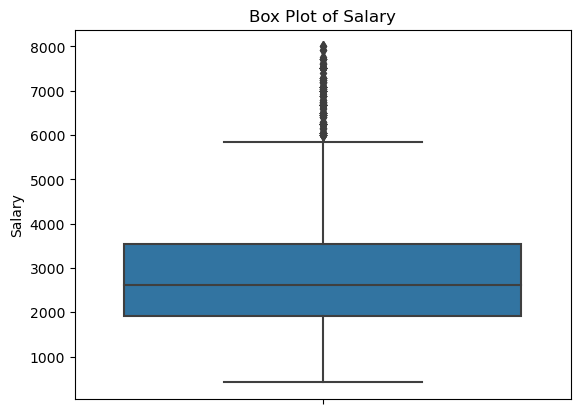

In [11]:
#check if there are outliers such as annual salaries.
sns.boxplot(data=df2, y="Salary")
plt.title(f"Box Plot of Salary")
plt.ylabel("Salary")
plt.show()

In [12]:
#convert monthly salary to annual salary
def to_annual(value):
    return value * 12
df2["Salary"] = df2["Salary"].apply(to_annual)
df2.head()

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,74452424,Higher Level Teaching Assistant (HLTA),UK,Protocol Education,part_time,NaN,Education,14400.00,2012-11-27 12:00:00,2012-12-27 12:00:00,jobhuntlisting.com
1,21596209,Software Developers / Software Architects Not...,UK,Cordius Ltd,full_time,Permanent,Information Technology,37500.00,2013-06-26 15:00:00,2013-08-25 15:00:00,jobhuntlisting.com
2,26209684,Senior BI Consultant (Cognos),Walton-On-Thames,Understanding Recruitment,full_time,Permanent,Information Technology,51999.96,2012-10-18 15:00:00,2013-01-16 15:00:00,jobhuntlisting.com
3,63580090,"Technical Sales Manager, Pigments Fillers to S...",UK,Wallace Hind Selection,full_time,NaN,Sales,45000.00,2012-12-15 15:00:00,2013-02-13 15:00:00,jobhuntlisting.com
4,82331703,Channel Account Manager Software,Eastern England,Greenhill Group Ltd,full_time,NaN,Sales,35000.04,2012-12-29 12:00:00,2013-01-12 12:00:00,jobhuntlisting.com


#### Conflict 3: Categories do not match

In [13]:
#check categories of df1 and df2.
print(df1["Category"].unique())
print(df2["Category"].unique())

['Healthcare & Nursing Jobs' 'Sales Jobs' 'IT Jobs'
 'PR, Advertising & Marketing Jobs' 'Teaching Jobs'
 'Hospitality & Catering Jobs' 'Accounting & Finance Jobs'
 'Engineering Jobs']
['Education' 'Information Technology' 'Sales' 'Finance' 'Engineering'
 'Health' 'Hospitality' 'Marketing']


In [14]:
#They have the same general categories but with different names
#renaming the categories in df2
category_mapping = {
    'Education': 'Teaching Jobs',
    'Information Technology': 'IT Jobs',
    'Sales': 'Sales Jobs',
    'Finance': 'Accounting & Finance Jobs',
    'Engineering': 'Engineering Jobs',
    'Health': 'Healthcare & Nursing Jobs',
    'Hospitality': 'Hospitality & Catering Jobs',
    'Marketing': 'PR, Advertising & Marketing Jobs'
}

df2["Category"] = df2["Category"].map(category_mapping)
df2.head()

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,74452424,Higher Level Teaching Assistant (HLTA),UK,Protocol Education,part_time,NaN,Teaching Jobs,14400.00,2012-11-27 12:00:00,2012-12-27 12:00:00,jobhuntlisting.com
1,21596209,Software Developers / Software Architects Not...,UK,Cordius Ltd,full_time,Permanent,IT Jobs,37500.00,2013-06-26 15:00:00,2013-08-25 15:00:00,jobhuntlisting.com
2,26209684,Senior BI Consultant (Cognos),Walton-On-Thames,Understanding Recruitment,full_time,Permanent,IT Jobs,51999.96,2012-10-18 15:00:00,2013-01-16 15:00:00,jobhuntlisting.com
3,63580090,"Technical Sales Manager, Pigments Fillers to S...",UK,Wallace Hind Selection,full_time,NaN,Sales Jobs,45000.00,2012-12-15 15:00:00,2013-02-13 15:00:00,jobhuntlisting.com
4,82331703,Channel Account Manager Software,Eastern England,Greenhill Group Ltd,full_time,NaN,Sales Jobs,35000.04,2012-12-29 12:00:00,2013-01-12 12:00:00,jobhuntlisting.com


#### Conflict 4: Dates not in datetime Dtype

In [15]:
#check data types
print(df2.info())
#change data type of dates
df2["OpenDate"] = pd.to_datetime(df2["OpenDate"])
df2["CloseDate"] = pd.to_datetime(df2["CloseDate"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            5000 non-null   int64  
 1   Title         5000 non-null   object 
 2   Location      5000 non-null   object 
 3   Company       4514 non-null   object 
 4   ContractType  5000 non-null   object 
 5   ContractTime  3580 non-null   object 
 6   Category      5000 non-null   object 
 7   Salary        5000 non-null   float64
 8   OpenDate      5000 non-null   object 
 9   CloseDate     5000 non-null   object 
 10  SourceName    5000 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 429.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            5000 non-null   int64         
 1   Tit

#### Conflict 5: Nulls

In [16]:
#check nulls
print(df2.isnull().sum())
#just like in the first df, the nulls are changed to "non-specified"
df2["Company"].fillna("non-specified", inplace=True)
df2["ContractTime"].fillna("non-specified", inplace=True)
df2.isnull().sum()

Id                 0
Title              0
Location           0
Company          486
ContractType       0
ContractTime    1420
Category           0
Salary             0
OpenDate           0
CloseDate          0
SourceName         0
dtype: int64


Id              0
Title           0
Location        0
Company         0
ContractType    0
ContractTime    0
Category        0
Salary          0
OpenDate        0
CloseDate       0
SourceName      0
dtype: int64

In [17]:
df2

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,74452424,Higher Level Teaching Assistant (HLTA),UK,Protocol Education,part_time,non-specified,Teaching Jobs,14400.00,2012-11-27 12:00:00,2012-12-27 12:00:00,jobhuntlisting.com
1,21596209,Software Developers / Software Architects Not...,UK,Cordius Ltd,full_time,Permanent,IT Jobs,37500.00,2013-06-26 15:00:00,2013-08-25 15:00:00,jobhuntlisting.com
2,26209684,Senior BI Consultant (Cognos),Walton-On-Thames,Understanding Recruitment,full_time,Permanent,IT Jobs,51999.96,2012-10-18 15:00:00,2013-01-16 15:00:00,jobhuntlisting.com
3,63580090,"Technical Sales Manager, Pigments Fillers to S...",UK,Wallace Hind Selection,full_time,non-specified,Sales Jobs,45000.00,2012-12-15 15:00:00,2013-02-13 15:00:00,jobhuntlisting.com
4,82331703,Channel Account Manager Software,Eastern England,Greenhill Group Ltd,full_time,non-specified,Sales Jobs,35000.04,2012-12-29 12:00:00,2013-01-12 12:00:00,jobhuntlisting.com
...,...,...,...,...,...,...,...,...,...,...,...
4995,86492769,Head of Regulatory Policy,London,Jonathan Lee Recruitment Ltd,full_time,Permanent,Accounting & Finance Jobs,69999.96,2013-01-30 00:00:00,2013-03-31 00:00:00,jobhuntlisting.com
4996,66519800,Android Developer eMarkets and eCommerce Ber...,Berkshire,Impact 360,full_time,Permanent,IT Jobs,60000.00,2012-06-28 12:00:00,2012-08-27 12:00:00,jobhuntlisting.com
4997,32361732,SAS Senior Collections Recoveries Analyst,London,Aspire Data Recruitment,full_time,Permanent,Accounting & Finance Jobs,33999.96,2013-04-24 00:00:00,2013-07-23 00:00:00,jobhuntlisting.com
4998,90043389,Lead PHP Magento Developer London ****k,London,Annapurna HR Ltd,full_time,Permanent,IT Jobs,57500.04,2012-11-18 15:00:00,2012-12-18 15:00:00,jobhuntlisting.com


### Merging data
This part is quite straightforward since all the issues with df2 were already addressed

In [18]:
# Code to merge two data sets
merged_df = pd.concat([df1, df2], ignore_index=True)
merged_df

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,71841720,Optical Assistant Oxfordshire,Oxfordshire,Inspired Selections,non-specified,non-specified,Healthcare & Nursing Jobs,14500.00,2012-04-04 15:00:00,2012-06-03 15:00:00,jobs.opticianonline.net
1,72226495,Optical Dispensing Manager Jobs in Durham,Durham,Flame Health Associates LLP,non-specified,non-specified,Healthcare & Nursing Jobs,22000.00,2012-04-08 15:00:00,2012-04-22 15:00:00,jobs.opticianonline.net
2,70205812,Optometrist Longton,Stoke-On-Trent,Zest Optical,non-specified,non-specified,Healthcare & Nursing Jobs,44000.00,2012-03-26 12:00:00,2012-04-09 12:00:00,jobs.opticianonline.net
3,71654671,Dispensing Optician Manager location Weymouth ...,Weymouth,Match2Match,non-specified,non-specified,Healthcare & Nursing Jobs,25000.00,2013-07-05 15:00:00,2013-09-03 15:00:00,jobs.opticianonline.net
4,71841842,Part Time Optometrist Wiltshire,Wiltshire,Inspired Selections,non-specified,non-specified,Healthcare & Nursing Jobs,50000.00,2013-09-19 00:00:00,2013-10-19 00:00:00,jobs.opticianonline.net
...,...,...,...,...,...,...,...,...,...,...,...
55745,86492769,Head of Regulatory Policy,London,Jonathan Lee Recruitment Ltd,full_time,Permanent,Accounting & Finance Jobs,69999.96,2013-01-30 00:00:00,2013-03-31 00:00:00,jobhuntlisting.com
55746,66519800,Android Developer eMarkets and eCommerce Ber...,Berkshire,Impact 360,full_time,Permanent,IT Jobs,60000.00,2012-06-28 12:00:00,2012-08-27 12:00:00,jobhuntlisting.com
55747,32361732,SAS Senior Collections Recoveries Analyst,London,Aspire Data Recruitment,full_time,Permanent,Accounting & Finance Jobs,33999.96,2013-04-24 00:00:00,2013-07-23 00:00:00,jobhuntlisting.com
55748,90043389,Lead PHP Magento Developer London ****k,London,Annapurna HR Ltd,full_time,Permanent,IT Jobs,57500.04,2012-11-18 15:00:00,2012-12-18 15:00:00,jobhuntlisting.com


### Resolving data conflicts of merged_df:
Rows with duplicate Id numbers were found but as per the assignment specification, the ID numbers must not be changed.

#### Check for ID duplications

In [19]:
# Find duplicated IDs
duplicate_ids = merged_df[merged_df.duplicated(subset='Id', keep=False)]
duplicate_ids

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
36866,72373236,Java Equity Derivatives Real Time Developer,Central London,Astbury Marsden,non-specified,permanent,IT Jobs,67500.0,2012-05-06 00:00:00,2012-07-05 00:00:00,jobserve.com
37307,72373240,Front End Web Developer HTML CSS net London,London,Austin Fraser Ltd,non-specified,contract,IT Jobs,54000.0,2013-06-06 15:00:00,2013-08-05 15:00:00,jobserve.com
38396,72373234,Senior Cerner Solution Specialist,London,IT Works Recruitment Ltd,non-specified,permanent,IT Jobs,39000.0,2012-01-05 12:00:00,2012-02-04 12:00:00,jobserve.com
40247,72373234,Supply Teacher,Buckinghamshire,A Plus Teachers,full_time,contract,Teaching Jobs,28200.0,2012-10-29 15:00:00,2012-12-28 15:00:00,jobsineducation.co.uk
41208,72373236,Quality Engineer CAPA Systems,Crawley,Advanced Resource Managers Limited.,non-specified,contract,Engineering Jobs,30000.0,2013-02-09 12:00:00,2013-04-10 12:00:00,justengineers.net
47440,72373240,Quality Engineer (German Speaking),Sunderland,JAM Recruitment,non-specified,permanent,Engineering Jobs,36500.0,2012-09-13 12:00:00,2012-10-13 12:00:00,tntjobs.co.uk


#### Check for complete duplications
different Id numbers with have the same value for everything else.

In [20]:
duplicate_columns = ["Title", "Location", "Company","ContractType","ContractTime","Category","Salary",
                     "OpenDate","CloseDate","SourceName"]
duplicate_rows = merged_df[merged_df.duplicated(subset=duplicate_columns, keep=False)]
dupes = duplicate_rows["Title"].unique()
print(len(dupes))
duplicate_rows

0


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName


#### Finding global key for the data
Checking Id's column to see if all values are unique

In [21]:
# Check if any IDs are duplicated
duplicate_ids = merged_df['Id'].duplicated()
if duplicate_ids.any():
    print("There are duplicate IDs in the DataFrame.")
else:
    print("All IDs in the DataFrame are unique.")


There are duplicate IDs in the DataFrame.


In [22]:
is_index_unique = merged_df.index.is_unique
print("Is index unique:", is_index_unique)


Is index unique: True


#### There are duplicates in the Id column so it is unsuitable to be a key. The Index is unique so it can be used as the key by replaceing the ID column with the index.


### 5. Saving the integrated and reshaped data
The last part of the integration process is to export our output data to csv format

In [23]:
# code to save output data
merged_df.to_csv('dataset_integrated.csv', index=False)

## Summary of the Project

In the process of merging the CSV files from the first notebook and the new notebook, I loaded, audited, and cleaned the data to address schema-level conflicts such as missing columns, column order discrepancies, and data type variations. After reordering and renaming columns for consistency, I focused on data-level conflicts, handling duplicates within each DataFrame. The merged dataset, named `merged_df`, resulted from combining the cleaned DataFrames. The final quality check ensured data integrity. Additionally, duplicate IDs within `merged_df` were resolved by assigning new unique IDs to duplicates. The outcome is a coherent dataset with complete information from both datasets, effectively addressing various conflicts and preparing the data for subsequent analysis.